# Importações

In [1]:
!pip install plotly

!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import funcs as f
import pandas as pd
import math
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import random as rd

/home/geffte-caetano/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Separando os dataframes e mapeando os sintomas

In [3]:
df_sivep = f.ler_planilha()

In [4]:
srag_influenza        = df_sivep[df_sivep['CLASSI_FIN'] == 1]
srag_outros_virus     = df_sivep[df_sivep['CLASSI_FIN'] == 2]
srag_outros_agentes   = df_sivep[df_sivep['CLASSI_FIN'] == 3]
srag_nao_especificado = df_sivep[df_sivep['CLASSI_FIN'] == 4]
covid                 = df_sivep[df_sivep['CLASSI_FIN'] == 5]

In [2]:
mapa_sintomas = {
    'NOSOCOMIAL',
    'AVE_SUINO',
    'FEBRE',
    'TOSSE',
    'GARGANTA',
    'DISPNEIA',
    'DESC_RESP',
    'SATURACAO',
    'DIARREIA',
    'VOMITO',
    'OUTRO_SIN'
}

# SRAG por influenza

In [15]:
df_srag = pd.DataFrame()
for coluna in srag_influenza.columns:
    if coluna in mapa_sintomas:
        df_srag[coluna] = srag_influenza[coluna]

In [58]:
for key in df_srag.keys():
    for linha in df_srag[key]:
        if math.isnan(linha):
            df_srag[key] = df_srag[key].replace(linha, 9)


In [59]:
df_srag

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,cluster
102,2.0,2.0,1.0,1.0,1.0,9.0,9.0,1.0,9.0,9.0,1.0,2
114,2.0,2.0,9.0,1.0,9.0,9.0,9.0,9.0,1.0,9.0,1.0,2
300,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1
411,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,9.0,9.0,0
425,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1966,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1
1977,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1
1988,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,9.0,1
1998,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0,1


In [18]:
X = df_srag.to_numpy()

In [19]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random', perplexity=5).fit_transform(X)
X_embedded.shape


(254, 3)

In [20]:
pca = PCA(n_components=3)
X_embedded = pca.fit_transform(X)
X_embedded.shape

(254, 3)

In [21]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X)
kmeans.labels_

# Create dataframe
df_select = pd.DataFrame()

for i in range(10):
    cl = X[kmeans.labels_ == i]
    random_select = np.random.permutation(cl.shape[0])
    df_select = pd.concat([df_select, pd.DataFrame(cl[random_select[:5]])])

df_select

,0,1,2,3,4,5,6,7,8,9,10
0,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
1,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,1.0,1.0
2,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
3,2.0,2.0,9.0,1.0,9.0,1.0,1.0,1.0,9.0,1.0,1.0
4,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
2,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0
4,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,9.0


In [22]:
reduced_data = X_embedded

fig = px.scatter_3d(x=reduced_data[:,0], y=reduced_data[:,1], z=reduced_data[:,2])

annotations=[]

for i in range(reduced_data.shape[0]):    

    annotations.append(dict(x=reduced_data[i, 0], y=reduced_data[i, 1], z=reduced_data[i, 2], text=str(i), showarrow=True))

fig.update_layout(scene=dict(annotations=annotations))

fig.show()

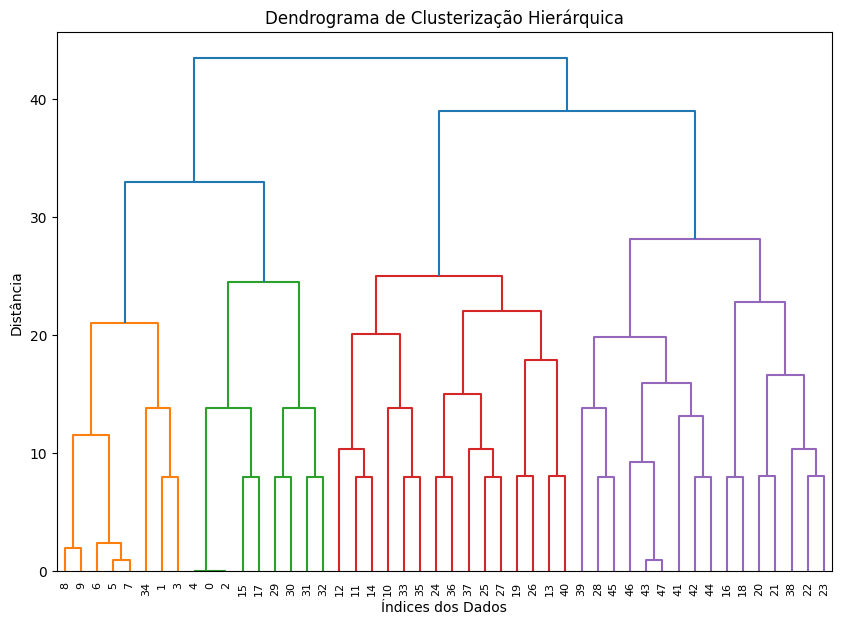

In [23]:
X = df_select.to_numpy()

clustering = AgglomerativeClustering(n_clusters=9).fit(X)

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))

dendrogram(Z)
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índices dos Dados')
plt.ylabel('Distância')
plt.show()

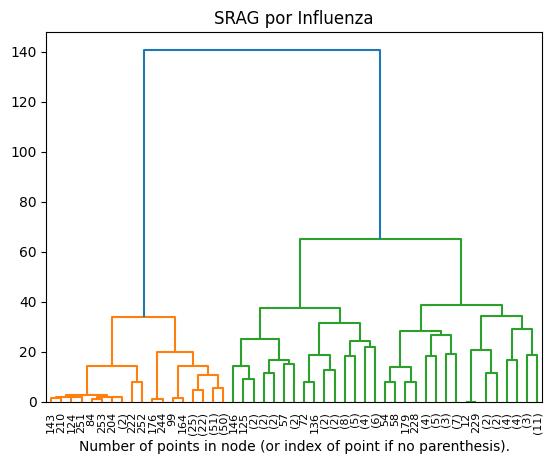

In [24]:
nome = 'SRAG por Influenza'
model = f.plotar_dendograma(df=df_srag, distance=50, name=nome)

In [25]:
df_srag['cluster'] = model.labels_
df_srag['cluster'].value_counts()

cluster
1    163
0     51
2     40
Name: count, dtype: int64

In [26]:
fig = px.parallel_coordinates(df_srag, color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG por Influenza')
fig.show()

In [ ]:
valor = df_srag[df_srag['cluster'] == 0]
valor

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,cluster
411,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,9.0,9.0,0
498,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,1.0,1.0,0
726,2.0,2.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,9.0,9.0,0
730,1.0,2.0,1.0,9.0,9.0,1.0,1.0,9.0,9.0,9.0,9.0,0
736,2.0,2.0,1.0,9.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,0
784,2.0,2.0,1.0,1.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,0
887,2.0,2.0,9.0,1.0,9.0,1.0,1.0,9.0,9.0,9.0,9.0,0
895,1.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0,0
930,2.0,2.0,9.0,1.0,9.0,1.0,1.0,1.0,9.0,1.0,1.0,0
939,2.0,2.0,1.0,1.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,0


# SRAG por outros vírus

In [27]:
df_srag_outros_v = pd.DataFrame()
for coluna in srag_outros_virus.columns:
    if coluna in mapa_sintomas:
        df_srag_outros_v[coluna] = srag_outros_virus[coluna]

In [28]:
for key in df_srag_outros_v.keys():
    for linha in df_srag_outros_v[key]:
        if math.isnan(linha):
            df_srag_outros_v[key] = df_srag_outros_v[key].replace(linha, 9)


In [29]:
df_srag_outros_v

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
30,2.0,2.0,9.0,9.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
79,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0
100,2.0,9.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
194,2.0,2.0,1.0,9.0,9.0,1.0,1.0,9.0,9.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1987,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
1997,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0
2000,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
2003,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0


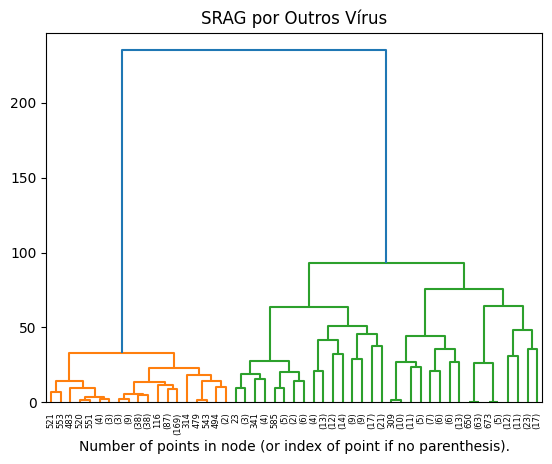

In [32]:
nome = 'SRAG por Outros Vírus'
model = f.plotar_dendograma(df_srag_outros_v, distance=90,name=nome)

In [33]:
df_srag_outros_v['cluster'] = model.labels_
df_srag_outros_v['cluster'].value_counts()

cluster
1    363
0    192
2    122
Name: count, dtype: int64

In [19]:
fig = px.parallel_coordinates(data_frame=df_srag_outros_v, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()

# SRAG por outro agente Etiológico

In [34]:
df_srag_outros_a = pd.DataFrame()
for coluna in srag_outros_agentes.columns:
    if coluna in mapa_sintomas:
        df_srag_outros_a[coluna] = srag_outros_agentes[coluna]

In [35]:
for key in df_srag_outros_a.keys():
    for linha in df_srag_outros_a[key]:
        if math.isnan(linha):
            df_srag_outros_a[key] = df_srag_outros_a[key].replace(linha, 9)


In [38]:
df_srag_outros_a

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
96,1.0,2.0,1.0,1.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0
129,2.0,2.0,1.0,1.0,2.0,2.0,1.0,9.0,1.0,1.0,2.0
248,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,9.0
755,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
897,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
1791,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


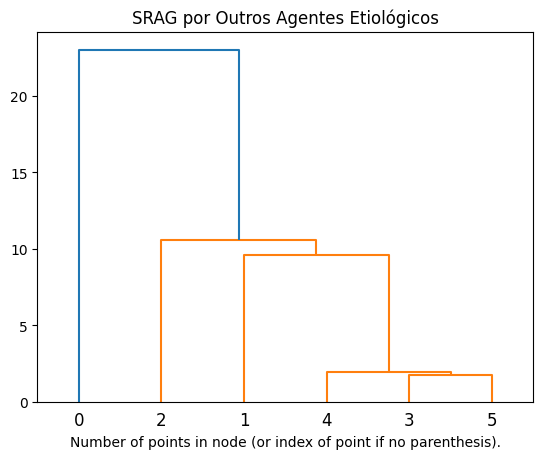

In [42]:
nome = 'SRAG por Outros Agentes Etiológicos'
model = f.plotar_dendograma(df_srag_outros_a, distance=11,name=nome)

In [43]:
df_srag_outros_a['cluster'] = model.labels_
df_srag_outros_a['cluster'].value_counts()

cluster
0    5
1    1
Name: count, dtype: int64

In [44]:
fig = px.parallel_coordinates(data_frame=df_srag_outros_a, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()

# SRAG não especificado

In [45]:
df_srag_nao_espec = pd.DataFrame()
for coluna in srag_nao_especificado.columns:
    if coluna in mapa_sintomas:
        df_srag_nao_espec[coluna] = srag_nao_especificado[coluna]

In [46]:
for key in df_srag_nao_espec.keys():
    for linha in df_srag_nao_espec[key]:
        if math.isnan(linha):
            df_srag_nao_espec[key] = df_srag_nao_espec[key].replace(linha, 9)


In [47]:
df_srag_nao_espec

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
1,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
3,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
4,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
5,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1985,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
1986,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
1989,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
1991,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0


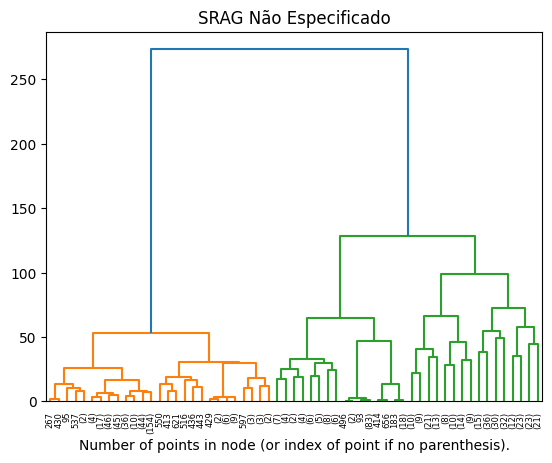

In [51]:
nome = 'SRAG Não Especificado'
model = f.plotar_dendograma(df_srag_nao_espec, distance=90,name=nome)

In [52]:
df_srag_nao_espec['cluster'] = model.labels_
df_srag_nao_espec['cluster'].value_counts()

cluster
3    395
0    192
2    150
1     94
Name: count, dtype: int64

In [48]:
fig = px.parallel_coordinates(data_frame=df_srag_nao_espec, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()

# SRAG por COVID-19

In [53]:
df_covid = pd.DataFrame()
for coluna in covid.columns:
    if coluna in mapa_sintomas:
        df_covid[coluna] = covid[coluna]

In [54]:
for key in df_covid.keys():
    for linha in df_covid[key]:
        if math.isnan(linha):
            df_covid[key] = df_covid[key].replace(linha, 9)


In [55]:
df_covid

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
2,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
9,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
11,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
18,2.0,2.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0,9.0,1.0
19,2.0,2.0,1.0,1.0,9.0,9.0,1.0,9.0,9.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1549,2.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
1576,2.0,2.0,9.0,9.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0
1578,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0
1947,2.0,2.0,1.0,9.0,9.0,9.0,1.0,1.0,9.0,9.0,1.0


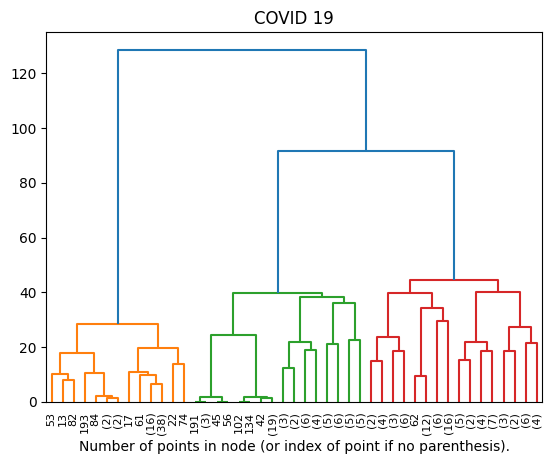

In [56]:
nome = 'COVID 19'

model = f.plotar_dendograma(df_covid, distance=90,name=nome)

In [57]:
df_covid['cluster'] = model.labels_
df_covid['cluster'].value_counts()

cluster
0    83
1    67
2    64
Name: count, dtype: int64

In [33]:
fig = px.parallel_coordinates(data_frame=df_covid, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()